## 국세청 통계 데이터를 이용한 코로나 발생이후 100대 생활업종 변화
- [CheetSheet](https://github.com/matplotlib/cheatsheets/blob/master/cheatsheets-1.png)
- [Codetorial](https://codetorial.net/matplotlib/index.html)
- [파이썬으로 데이터시각화 하기](https://wikidocs.net/book/5011)

### 0. 데이터셋 설명(100대 생활업종 명세)
- 그래프 chart
 
- 히스토그램 Histogram
 * 
- 다중 그래프

### 1. 지역별 사업자 현황
- 원그래프 Pie chart
- 상자그림 Boxplot
- 산점도 Scatter plot
- 선그래프 Line plot
- 상관분석 Correlation
- [Seaborn Module](https://seaborn.pydata.org/)

### 2. 업종별 사업자 현황
### 3. 지역별 주요 업종 비교
### 4. 코로나 전후의 사업자수 변화
### 5. 코로나 이후 감소한 업종
### 6. 코로나 이후 증가한 업종
### 7. 결론 : 코로나 1년이 자영업자에게 준 영향은 어떠한가?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
import sys
import io
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgunbd.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
%ls

 C 드라이브의 볼륨: SSD
 볼륨 일련 번호: BCA4-98AF

 C:\Users\inhoinno\Desktop\Ordered Softeware\2021 봄\빅데이터처리_신현석\HW_BIG 디렉터리

2021-06-03  오후 03:26    <DIR>          .
2021-06-03  오후 03:26    <DIR>          ..
2021-06-03  오전 01:58    <DIR>          .ipynb_checkpoints
2021-05-31  오후 08:41         7,362,645 1920_origin.zip
2021-06-02  오후 11:05    <DIR>          1920_preprocessed
2021-05-31  오후 08:40           378,221 1920_preprocessed.zip
2021-06-02  오후 11:15    <DIR>          1920_processed
2021-06-02  오후 08:48            74,295 2020_1_total.csv
2021-06-03  오전 01:49         1,864,515 COVID_BigTable(stack).csv
2021-06-03  오전 01:49           195,556 COVID_BigTable.csv
2021-06-02  오후 08:59         2,555,166 Data_-Idxing.ipynb
2021-05-31  오후 06:43             8,126 Data_preprocessing_Auto.ipynb
2021-06-02  오후 08:50            58,221 Data_preprocessing1.ipynb
2021-05-31  오후 06:43            92,753 Data_preprocessing1-M45.ipynb
2021-06-02  오후 08:23    <DIR>          Data_preprocessing2-Idxing
2021-06-03 

In [834]:
#data load
data = pd.read_csv('./COVID_BigTable.csv', encoding='utf-8').set_index(['year','month','city'])
data.index.names=['year','month','city']
data = data.sort_index()

In [5]:
data

B. 업종전체   가구점  가스충전소  가전제품수리점  가전제품판매점   간이주점  간판광고물업  \
year month city                                                             
2019 1     강원도        82677   300     93      465      444    439     505   
           경기도       520472  1873    372     3694     1810   2997    3113   
           경상남도      152758   564    151      790      727   1314     685   
           경상북도      125481   461    163      489      693    409     641   
           광주광역시      67965   214     41      393      339    188     443   
...                     ...   ...    ...      ...      ...    ...     ...   
2020 12    전라북도       88047   411    111      573      530    272     511   
           제주특별자치도    47390   191     34      194      250    156     197   
           충청남도      106102   299    130      705      532    544     479   
           충청북도       80408   275     74      495      412    391     383   
           합계       2548586  7650   1611    16962    10186  12219   12996   

                    감정평가사  건강보조식품가게  건어물가게  ...    편의점  피부ㆍ비뇨기과 의원  피부관리업  \
year month city                             ...                             
2019 1     강원도         29       496    667  ...   1589          58    951   
           경기도        358      2496    797  ...   9558         793   7548   
           경상남도        56       988    723  ...   2804         165   2399   
           경상북도        19       886    658  ...   1808          98   1390   
           광주광역시       32       397    167  ...   1010         126   1406   
...                   ...       ...    ...  ...    ...         ...    ...   
2020 12    전라북도        39       734    360  ...   1335          97   1405   
           제주특별자치도     16       180    110  ...   1200          44    794   
           충청남도        38      1272    635  ...   2383          99   1487   
           충청북도        32       435    108  ...   1615          81   1256   
           합계        1234     13988   7381  ...  44858        4071  42168   

                     피시방  한방병원ㆍ한의원   한식전문점  헬스클럽  호프전문점  화장품가게  휴대폰가게  
year month city                                                        
2019 1     강원도       420       357   19271   205   1485   1070    588  
           경기도      2413      3155   77957  1680   7127   7771   3901  
           경상남도      678       807   31752   386   1539   2434   1292  
           경상북도      593       635   29086   343   1068   1871   1086  
           광주광역시     426       416    9558   216   2406   1118    588  
...                  ...       ...     ...   ...    ...    ...    ...  
2020 12    전라북도      391       541   14620   244   1124   1474    722  
           제주특별자치도   168       199    9068   136    605    664    244  
           충청남도      452       517   20013   292   1391   1356    886  
           충청북도      359       406   15764   276   1533    985    551  
           합계       9970     14947  397465  8569  29002  35004  18737  

[432 rows x 101 columns]

In [7]:
df = pd.DataFrame(data.stack(), columns=['store'])

In [8]:
df

store
year month city                
2019 1     강원도  B. 업종전체   82677
                가구점         300
                가스충전소        93
                가전제품수리점     465
                가전제품판매점     444
...                         ...
2020 12    합계   한식전문점    397465
                헬스클럽       8569
                호프전문점     29002
                화장품가게     35004
                휴대폰가게     18737

[43632 rows x 1 columns]

---
## 1. 지역별 사업자 현황
* 지역 : 강원도, 경기도, ... 서울특별시, ..., 충청북도, 합계 
    - Pie Chart
    - Chart
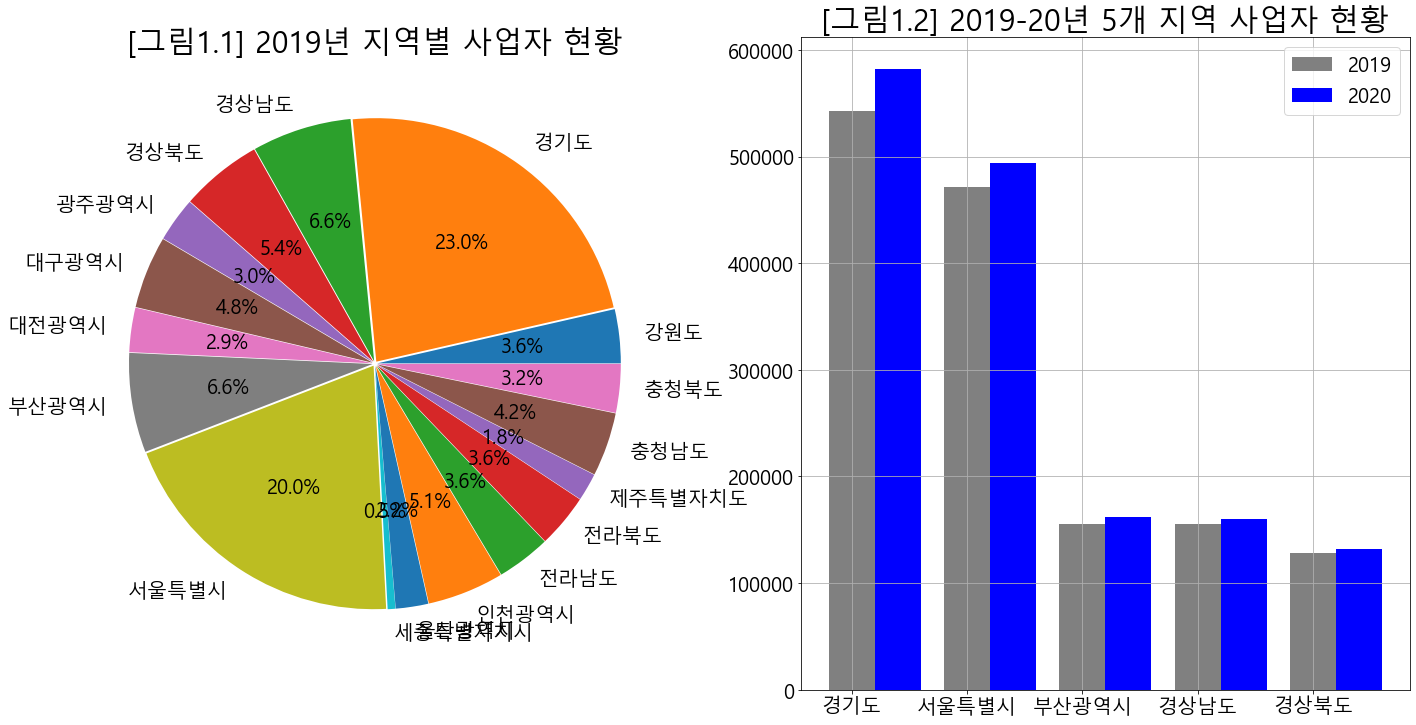

In [386]:
df_19 = data.loc[(slice(2019), slice(None),),:].unstack(level=1).loc[(slice(None), slice('B. 업종전체'))]
df_20 = data.loc[(slice(2020,2020), slice(None),),:].unstack(level=1).loc[(slice(None), slice('B. 업종전체'))]
df_19 = df_19.sort_index()
df_20 = df_20.sort_index()

In [387]:
idx = pd.IndexSlice

In [388]:
df_19 = df_19.sort_index()

In [389]:
df_19.index

MultiIndex([(2019,     '강원도'),
            (2019,     '경기도'),
            (2019,    '경상남도'),
            (2019,    '경상북도'),
            (2019,   '광주광역시'),
            (2019,   '대구광역시'),
            (2019,   '대전광역시'),
            (2019,   '부산광역시'),
            (2019,   '서울특별시'),
            (2019, '세종특별자치시'),
            (2019,   '울산광역시'),
            (2019,   '인천광역시'),
            (2019,    '전라남도'),
            (2019,    '전라북도'),
            (2019, '제주특별자치도'),
            (2019,    '충청남도'),
            (2019,    '충청북도'),
            (2019,      '합계')],
           names=['year', 'city'])

In [390]:
df_20.index

MultiIndex([(2020,     '강원도'),
            (2020,     '경기도'),
            (2020,    '경상남도'),
            (2020,    '경상북도'),
            (2020,   '광주광역시'),
            (2020,   '대구광역시'),
            (2020,   '대전광역시'),
            (2020,   '부산광역시'),
            (2020,   '서울특별시'),
            (2020, '세종특별자치시'),
            (2020,   '울산광역시'),
            (2020,   '인천광역시'),
            (2020,    '전라남도'),
            (2020,    '전라북도'),
            (2020, '제주특별자치도'),
            (2020,    '충청남도'),
            (2020,    '충청북도'),
            (2020,      '합계')],
           names=['year', 'city'])

In [391]:
df_19.index = df_19.index.droplevel()
df_19.columns = df_19.columns.droplevel()
df_20.index =df_20.index.droplevel()
df_20.columns = df_20.columns.droplevel()


In [392]:
df_19 = df_19.iloc[:-1]
df_20 = df_20.iloc[:-1]

In [393]:
#plt.rcParams.keys()

In [395]:
df_20

month,1,2,3,4,5,6,7,8,9,10,11,12
city,,,,,,,,,,,,
강원도,85671,85777,85671,86288,86702,87269,87834,88082,88513,88777,89078,89174
경기도,558878,561970,564220,568995,573325,579208,584928,589504,595288,600608,605277,607611
경상남도,157493,157833,157677,158304,159124,160082,160861,161520,162405,163113,163758,164113
경상북도,129486,129615,129542,130110,130822,131699,132196,132711,133292,133861,134378,134420
광주광역시,70997,71137,71367,71610,71892,72330,72610,72783,73292,73601,73822,73840
대구광역시,115230,115508,115633,116345,117073,117929,118589,119004,119650,120146,120632,120587
대전광역시,70759,70893,70954,71282,71531,72008,72376,72543,72927,73245,73569,73542
부산광역시,158114,158451,158710,159961,160868,161958,162888,163666,164602,165454,166158,166264
서울특별시,480266,482174,481508,484468,487912,492161,496455,498716,501875,504873,507899,508188


Text(0.5, 1.0, '2019년 지역별 사업자 현황')

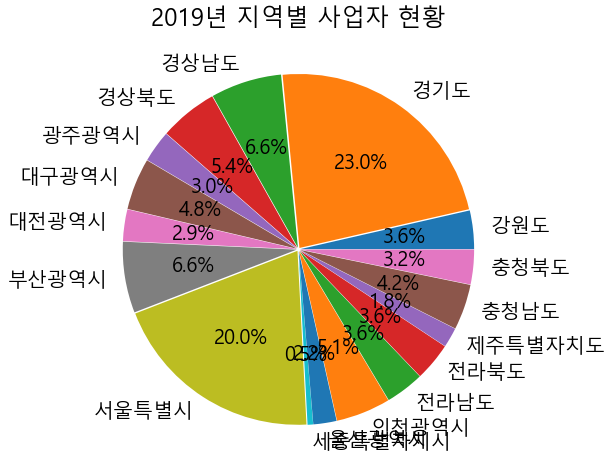

In [446]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 20
labels = df_19.index 
plt.pie(df_19.mean(axis =1), labels = labels, autopct='%.1f%%',  explode= [0.01]*len(labels))
plt.title("2019년 지역별 사업자 현황")

In [397]:
df = pd.DataFrame(df_19.mean(axis =1), index = df_19.index,columns=['val']).sort_values(by='val', ascending=False).head(5)
df2 = pd.DataFrame(df_20.mean(axis =1), index = df_20.index,columns=['val']).sort_values(by='val', ascending=False).head(5)

In [398]:
df['val'].values

array([542413.91666667, 471121.58333333, 155873.75      , 155717.58333333,
       127949.25      ])

In [400]:
df2

,val
city,
경기도,582484.333333
서울특별시,493874.583333
부산광역시,162257.833333
경상남도,160523.583333
경상북도,131844.333333


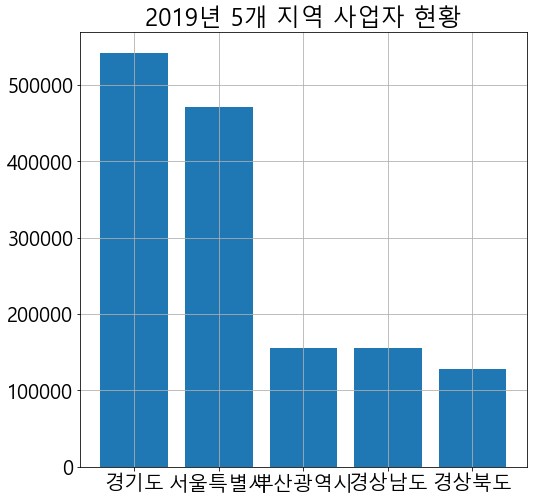

In [405]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 20
labels = df.index 
plt.bar(df.index,df['val'].values, width=0.8)
plt.title("2019년 5개 지역 사업자 현황")
plt.grid(True)

In [402]:
df2

,val
city,
경기도,582484.333333
서울특별시,493874.583333
부산광역시,162257.833333
경상남도,160523.583333
경상북도,131844.333333


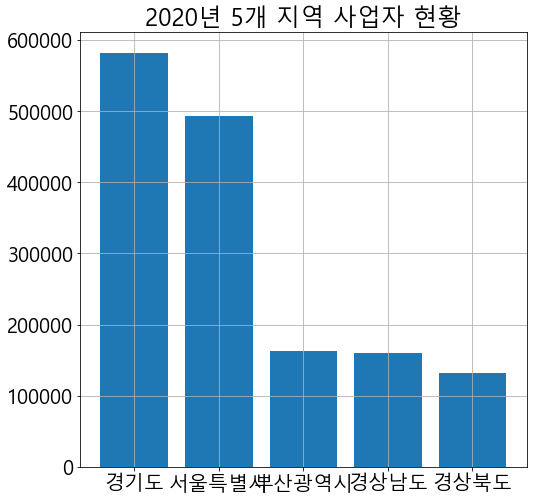

In [404]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 20
labels = df2.index 
plt.bar(df2.index,df2['val'].values, width=0.8)
plt.title("2020년 5개 지역 사업자 현황")
plt.grid(True)

([<matplotlib.axis.YTick at 0x1a52f333cd0>,
 [Text(0, 0, '0'), Text(0, 0, '0.2M'), Text(0, 0, '0.4M'), Text(0, 0, '0.6M')])

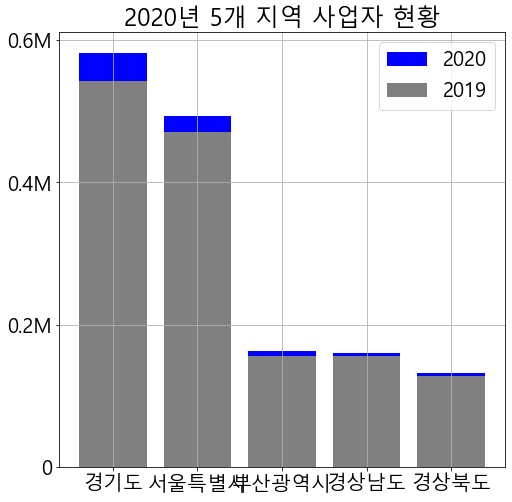

In [431]:

plt.bar(df2.index,df2['val'].values, width=0.8, color='blue', label='2020')
plt.bar(df.index,df['val'].values, width=0.8, color='gray', label='2019')
plt.title("2020년 5개 지역 사업자 현황")
plt.legend(loc='best')
plt.grid(True)
plt.yticks(np.arange(0, 800000, step=200000), ('0', '0.2M', '0.4M', '0.6M', '0.8M', '1M'))

([<matplotlib.axis.YTick at 0x1a53088ce50>,
 [Text(0, 0, '0'), Text(0, 0, '0.2M'), Text(0, 0, '0.4M'), Text(0, 0, '0.6M')])

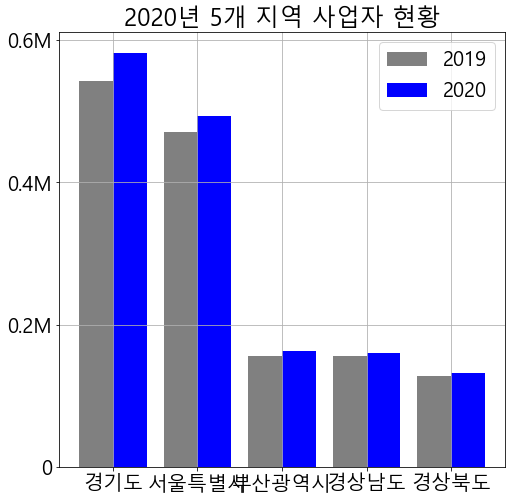

In [442]:
x=np.arange(len(df.index))
w=0.4
plt.bar(df.index,df['val'].values, width=0.4, color='gray', label='2019')
plt.bar(x+w,df2['val'].values, width=0.4, color='blue', label='2020')
plt.title("2020년 5개 지역 사업자 현황")
plt.legend(loc='best')
plt.grid(True)
plt.xticks(x+w/2,df.index)
plt.yticks(np.arange(0, 800000, step=200000), ('0', '0.2M', '0.4M', '0.6M', '0.8M', '1M'))

In [441]:
fig

([<matplotlib.axis.YTick at 0x1a530827760>,
 [Text(0, 0, '0'),
  Text(0, 200000, '0.2M'),
  Text(0, 400000, '0.4M'),
  Text(0, 600000, '0.6M')])

In [433]:
plt.show()

In [418]:
np.arange(0, 7)

array([0, 1, 2, 3, 4, 5, 6])

In [338]:
?plt.bar

In [ ]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 20
labels = df_19.index 
plt.hist(df_19.mean(axis =1), labels = labels, autopct='%.1f%%',  explode= [0.01]*len(labels))
plt.title("2019년 5개 지역 사업자 현황")

Text(0.5, 1.0, '[그림1.2] 2019-20년 5개 지역 사업자 변화')

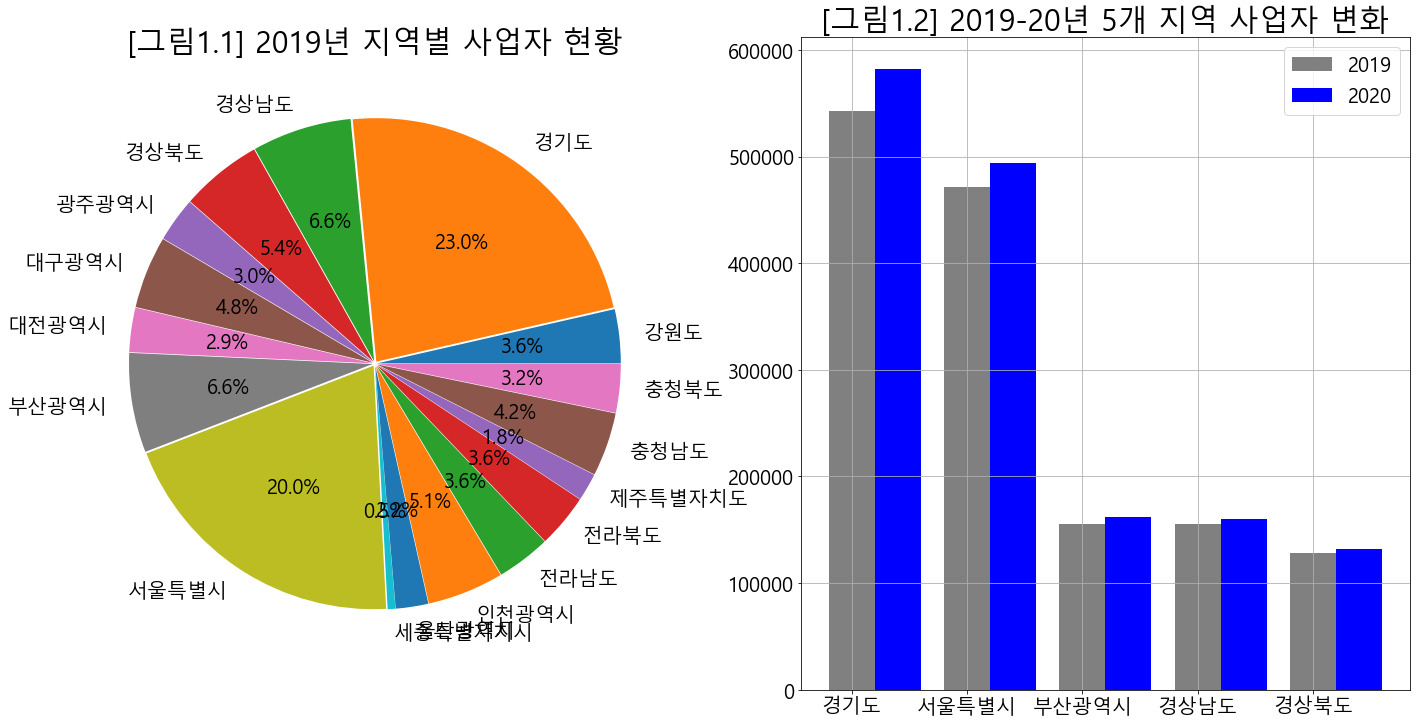

In [481]:
x=np.arange(len(df.index))
w=0.4
fig , axes = plt.subplots(1,2, figsize=(24,12))
axes[0].pie(df_20.mean(axis =1), labels = df_20.index , autopct='%.1f%%',  explode= [0.01]*len(labels))
axes[0].set_title("[그림1.1] 2020년 지역별 사업자 현황", fontsize=30)
axes[1].bar(df.index,df['val'].values, width=0.4, color='gray', label='2019')
axes[1].bar(x+w,df2['val'].values, width=0.4, color='blue', label='2020')
axes[1].legend(loc='best')
#axes[1].set_yticks(np.arange(0, 800000, step=200000), ('0', '0.2M', '0.4M', '0.6M', '0.8M', '1M'))
axes[1].grid(True)
axes[1].set_title("[그림1.2] 2019-20년 5개 지역 사업자 변화", fontsize=30)

## 2. 업종별 사업자 현황
* 업종 : 가구점, ... 미용사, 변리사, ...,합계 
    - 2019-20 100개 업종 사업자 현황 
![[그림2.1] 2019-20 업종별 사업자 현황](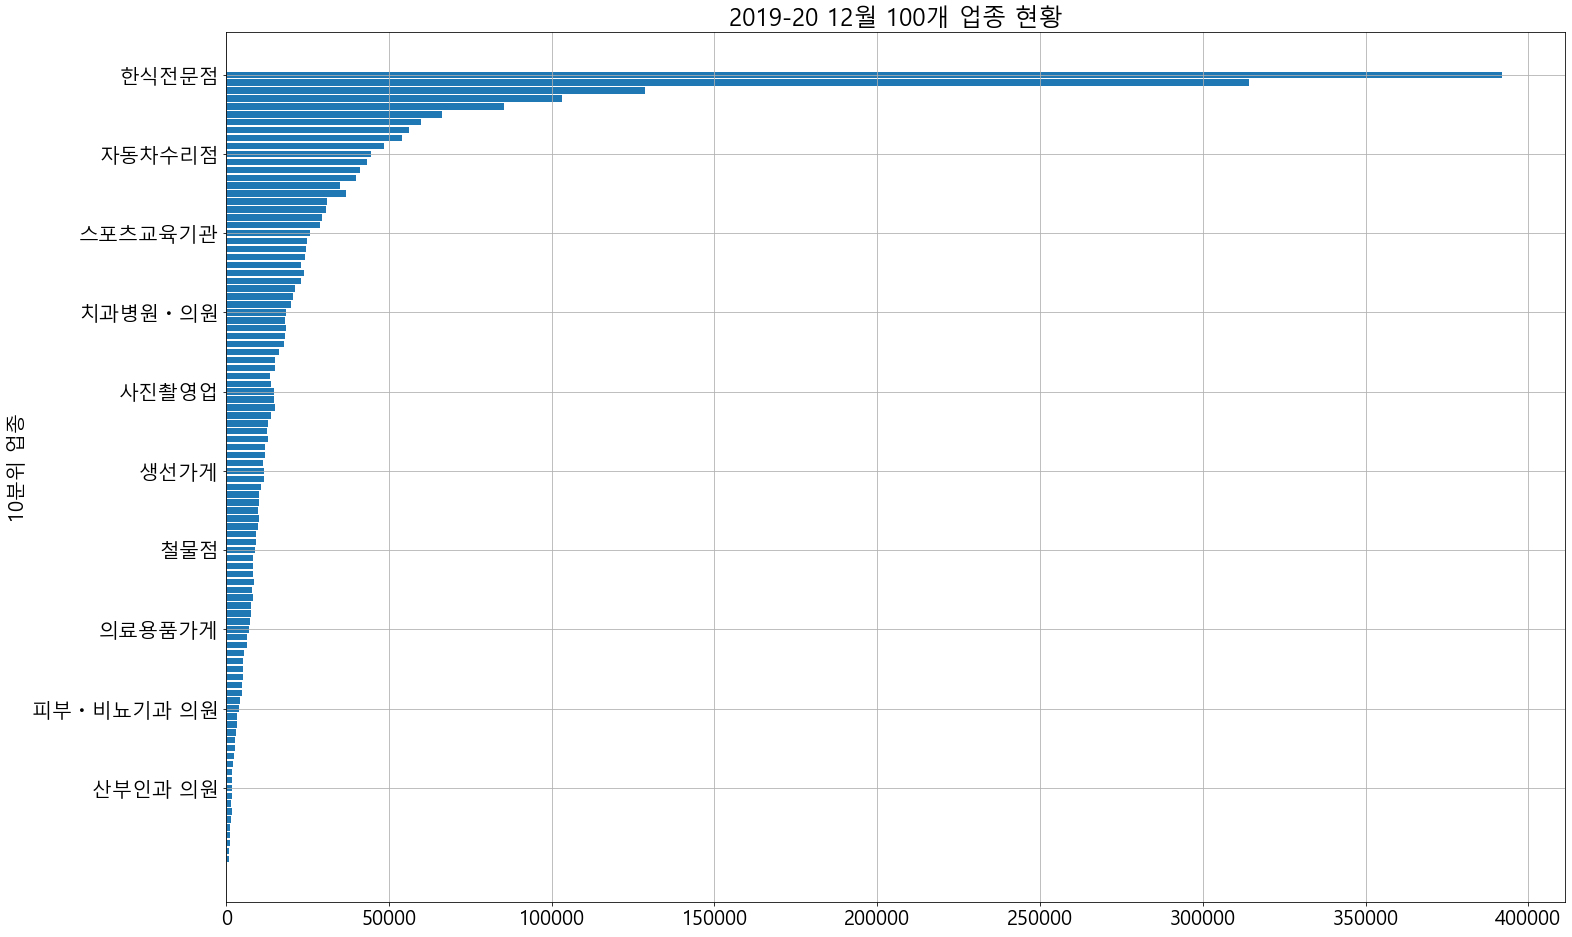) 
    - 1~40위 업종 현황
![[그림2.2] 1위~40위 ](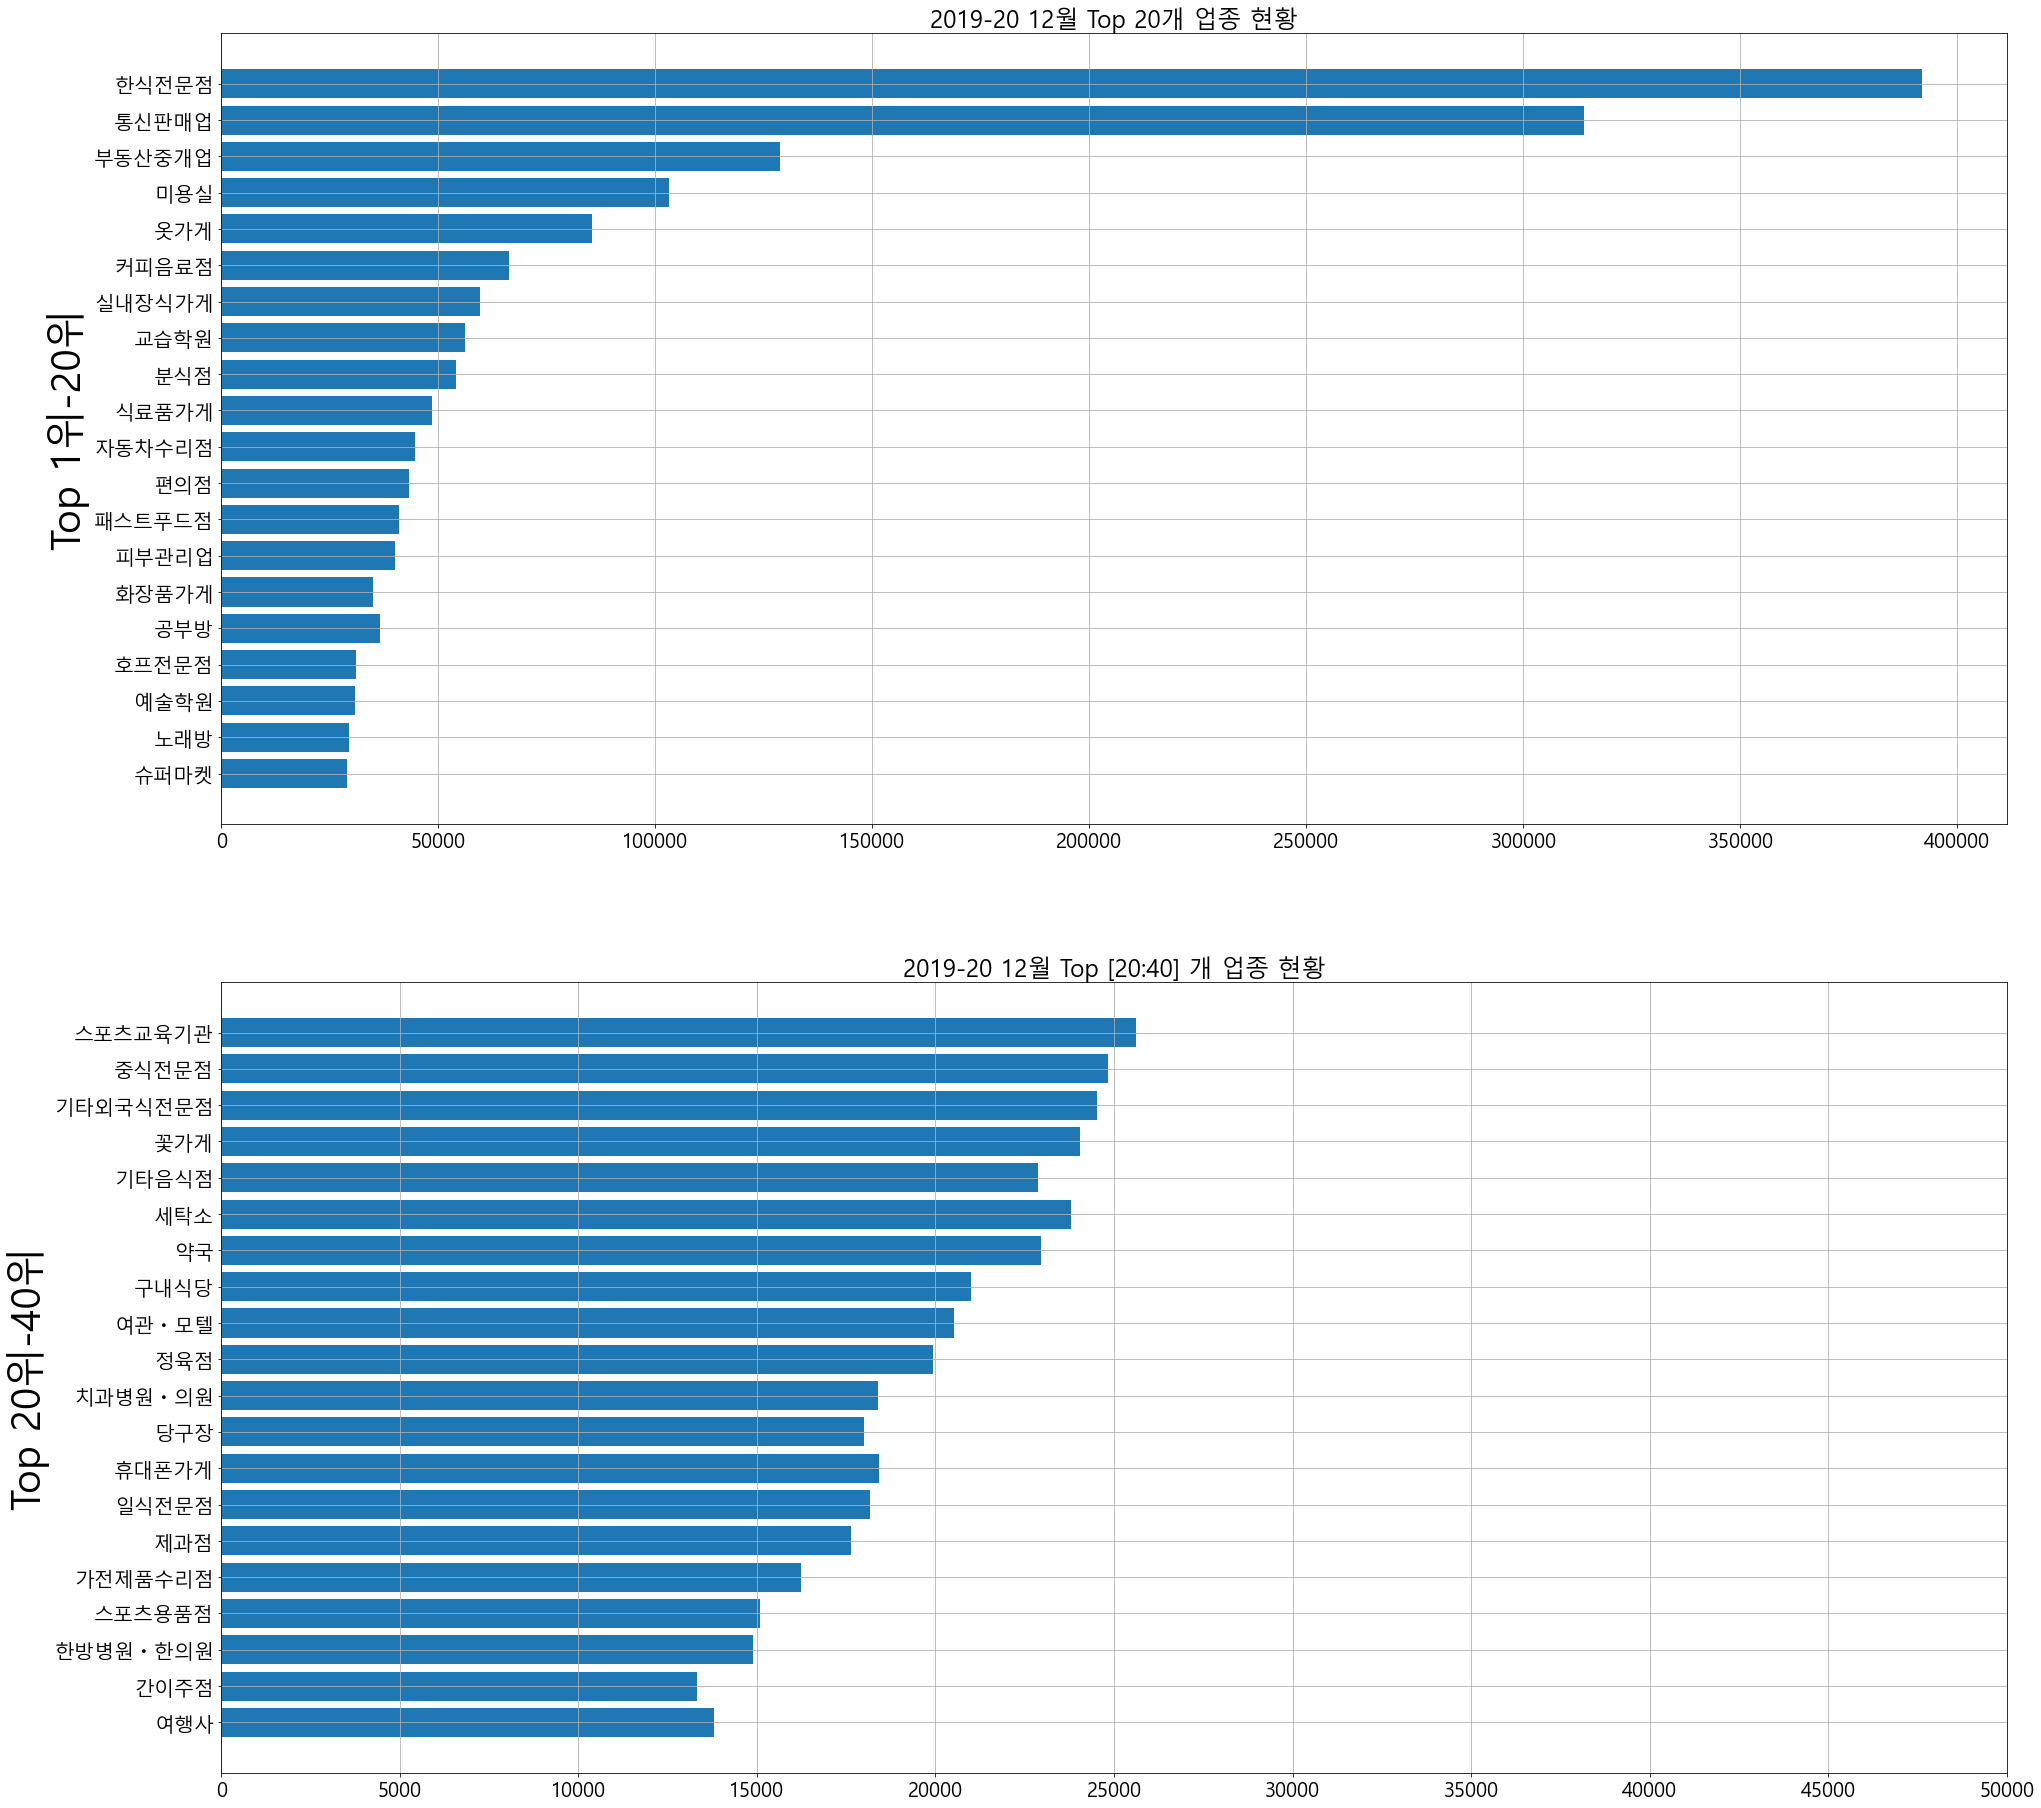%0A)

In [485]:
len(df_19.mean(axis =1))

17

In [ ]:
#idx = pd.IndexSlice # 인덱스 객체 생성
#test.loc[idx[:,'강원도'],idx['LPG 충전소':]]

In [928]:
idx=pd.IndexSlice
data.stack().loc[idx[:2019,1,'합계'],:]
#df_19 = data.loc[(slice(2019), slice(None),),:].unstack(level=1).loc[(slice(None), slice('B. 업종전체'))]
#df_20 = data.loc[(slice(2020,2020), slice(None),),:].unstack(level=1).loc[(slice(None), slice('B. 업종전체'))]

year  month  city         
2019  1      강원도   B. 업종전체     82677
                   가구점           300
                   가스충전소          93
                   가전제품수리점       465
                   가전제품판매점       444
                               ...  
      12     합계    한식전문점      386161
                   헬스클럽         7718
                   호프전문점       32992
                   화장품가게       34922
                   휴대폰가게       18109
Length: 21816, dtype: int64

In [929]:
data.columns[1:]

Index(['가구점', '가스충전소', '가전제품수리점', '가전제품판매점', '간이주점', '간판광고물업', '감정평가사',
       '건강보조식품가게', '건어물가게', '건축사', '결혼상담소', '곡물가게', '공부방', '공인노무사', '공인회계사',
       '과일가게', '교습학원', '구내식당', '기술및직업훈련학원', '기술사', '기타 일반의원', '기타외국식전문점',
       '기타음식점', '꽃가게', '내과ㆍ소아과 의원', '노래방', '담배가게', '당구장', '독서실', '동물병원', '목욕탕',
       '문구점', '미용실', '법무사', '변리사', '변호사', '부동산중개업', '분식점', '사진촬영업', '산부인과 의원',
       '생선가게', '서점', '성형외과 의원', '세무사', '세탁소', '슈퍼마켓', '스포츠교육기관', '스포츠시설운영업',
       '스포츠용품점', '시계ㆍ귀금속점', '식료품가게', '신경정신과 의원', '신발가게', '실내스크린골프점', '실내장식가게',
       '실외골프연습장', '안경점', '안과 의원', '애완용품점', '약국', '여관ㆍ모텔', '여행사', '예술학원', '예식장',
       '옷가게', '의료용품가게', '이륜자동차판매점', '이발소', '이비인후과 의원', '일반외과 의원', '일식전문점',
       '자동차수리점', '자전거판매점', '장난감가게', '정육점', '제과점', '종합병원', '주유소', '주차장운영업',
       '중고차판매점', '중식전문점', '채소가게', '철물점', '치과병원ㆍ의원', '침구ㆍ커튼가게', '커피음료점',
       '컴퓨터판매점', '통신판매업', '패스트푸드점', '펜션ㆍ게스트하우스', '편의점', '피부ㆍ비뇨기과 의원', '피부관리업',
       '피시방', '한방병원ㆍ한의원', '한식전문점', '헬스클럽', '호프전문점', '화장품가게', '휴대폰가게'],
      dtyp

In [930]:
df_19 = data.loc[idx[2019,idx[:],'합계'],:][data.columns[1:]]
df_20 = data.loc[idx[2020,idx[:],'합계'],:][data.columns[1:]]

In [931]:
df_19 = pd.DataFrame(df_19.stack())
df_19.rename(columns = {0:"val"},inplace=True)
df_20 = pd.DataFrame(df_20.stack())
df_20.rename(columns = {0:"val"},inplace=True)

In [932]:
df_19.index

MultiIndex([(2019,  1, '합계',        '가구점'),
            (2019,  1, '합계',      '가스충전소'),
            (2019,  1, '합계',    '가전제품수리점'),
            (2019,  1, '합계',    '가전제품판매점'),
            (2019,  1, '합계',       '간이주점'),
            (2019,  1, '합계',     '간판광고물업'),
            (2019,  1, '합계',      '감정평가사'),
            (2019,  1, '합계',   '건강보조식품가게'),
            (2019,  1, '합계',      '건어물가게'),
            (2019,  1, '합계',        '건축사'),
            ...
            (2019, 12, '합계',        '편의점'),
            (2019, 12, '합계', '피부ㆍ비뇨기과 의원'),
            (2019, 12, '합계',      '피부관리업'),
            (2019, 12, '합계',        '피시방'),
            (2019, 12, '합계',   '한방병원ㆍ한의원'),
            (2019, 12, '합계',      '한식전문점'),
            (2019, 12, '합계',       '헬스클럽'),
            (2019, 12, '합계',      '호프전문점'),
            (2019, 12, '합계',      '화장품가게'),
            (2019, 12, '합계',      '휴대폰가게')],
           names=['year', 'month', 'city', None], length=1200)

In [933]:
df_20.columns

Index(['val'], dtype='object')

In [772]:
df_20.loc[idx[2020,12,'합계']]

,val
가구점,7650
가스충전소,1611
가전제품수리점,16962
가전제품판매점,10186
간이주점,12219
...,...
한식전문점,397465
헬스클럽,8569
호프전문점,29002
화장품가게,35004


In [793]:
df = df_19.loc[idx[2019,12,'합계']].sort_values(by='val', ascending =True)
df2= df_20.loc[idx[2020,12,'합계']].sort_values(by='val', ascending =True)

In [794]:
df

,val
예식장,890
공인노무사,908
변리사,1029
기술사,1059
감정평가사,1169
...,...
옷가게,86092
미용실,101771
부동산중개업,125057
통신판매업,271383


In [795]:
df['val'].values

array([   890,    908,   1029,   1059,   1169,   1480,   1596,   1604,
         1665,   1679,   1748,   1826,   2228,   2528,   2592,   2645,
         3051,   3276,   3410,   3916,   4080,   4778,   4855,   4925,
         4980,   5009,   5495,   6459,   6551,   7103,   7190,   7351,
         7486,   7718,   7830,   7980,   8000,   8152,   8287,   8814,
         9168,   9216,   9649,   9813,   9865,  10019,  10102,  10674,
        11273,  11334,  11406,  11791,  11833,  12523,  12620,  12976,
        13454,  13638,  13868,  14138,  14185,  14413,  14817,  14987,
        15534,  17161,  17955,  18109,  18111,  18256,  19654,  20939,
        21677,  22687,  23310,  23474,  23742,  23778,  24610,  24945,
        29289,  30291,  30846,  32992,  33880,  34922,  37874,  38956,
        41786,  44056,  48680,  53934,  55880,  56837,  61548,  86092,
       101771, 125057, 271383, 386161], dtype=int64)

In [776]:
df.index.values[-20:]

array(['슈퍼마켓', '노래방', '예술학원', '호프전문점', '공부방', '화장품가게', '피부관리업', '패스트푸드점',
       '편의점', '자동차수리점', '식료품가게', '분식점', '교습학원', '실내장식가게', '커피음료점', '옷가게',
       '미용실', '부동산중개업', '통신판매업', '한식전문점'], dtype=object)

Text(0.5, 1.0, '2020 12월 Top 20개 업종 현황')

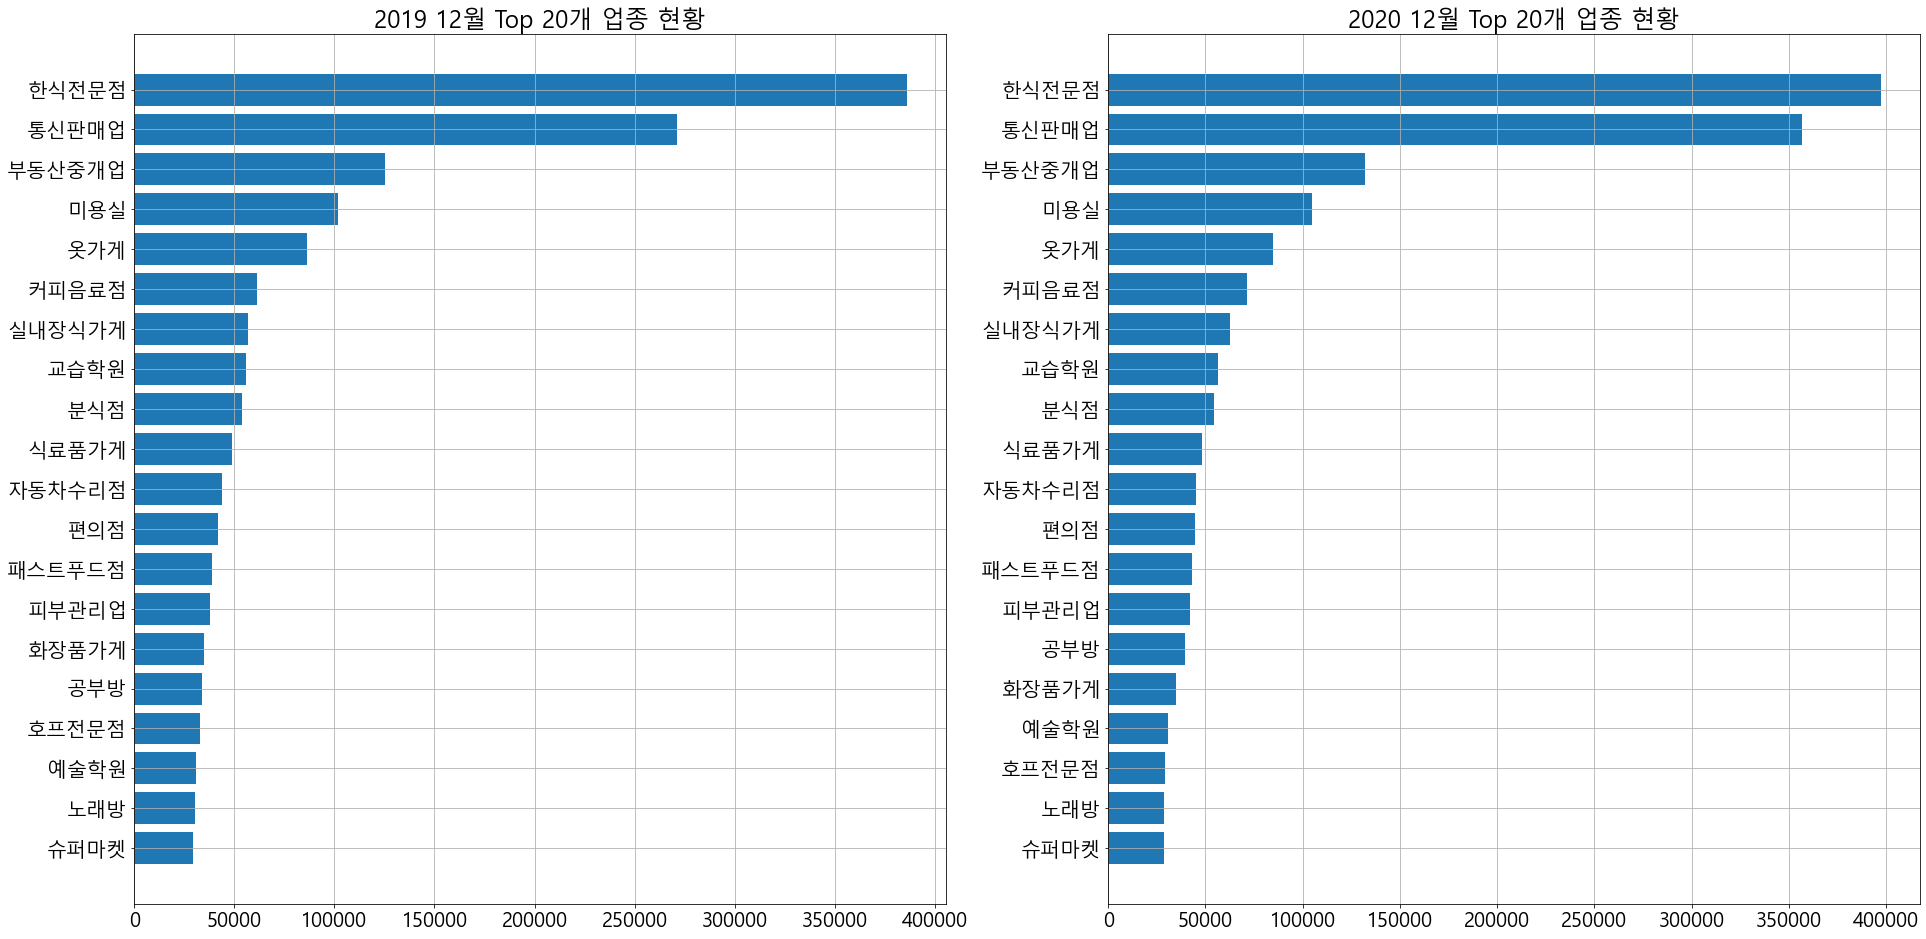

In [779]:
fig, axes = plt.subplots(1,2, figsize =(32,16))
axes[0].barh(df.index.values[-20:],df['val'].values[-20:])
axes[0].grid(True)
axes[0].set_title("2019 12월 Top 20개 업종 현황")
axes[1].barh(df2.index.values[-20:],df2['val'].values[-20:])
axes[1].grid(True)
axes[1].set_title("2020 12월 Top 20개 업종 현황")

In [813]:
df.rename(columns={'val':2019}, inplace=True)
df2.rename(columns={'val':2020},inplace=True)
df_total = pd.concat([df,df2], axis=1)
df_total['total'] =df_total.mean(axis=1).astype(int)

In [1064]:
tp20col=df_total['total'][-20:].index
tp40col=df_total['total'][-40:-20].index

In [1065]:
tp20col

Index(['슈퍼마켓', '노래방', '예술학원', '호프전문점', '공부방', '화장품가게', '피부관리업', '패스트푸드점',
       '편의점', '자동차수리점', '식료품가게', '분식점', '교습학원', '실내장식가게', '커피음료점', '옷가게',
       '미용실', '부동산중개업', '통신판매업', '한식전문점'],
      dtype='object')

Text(0, 0.5, '10분위 업종')

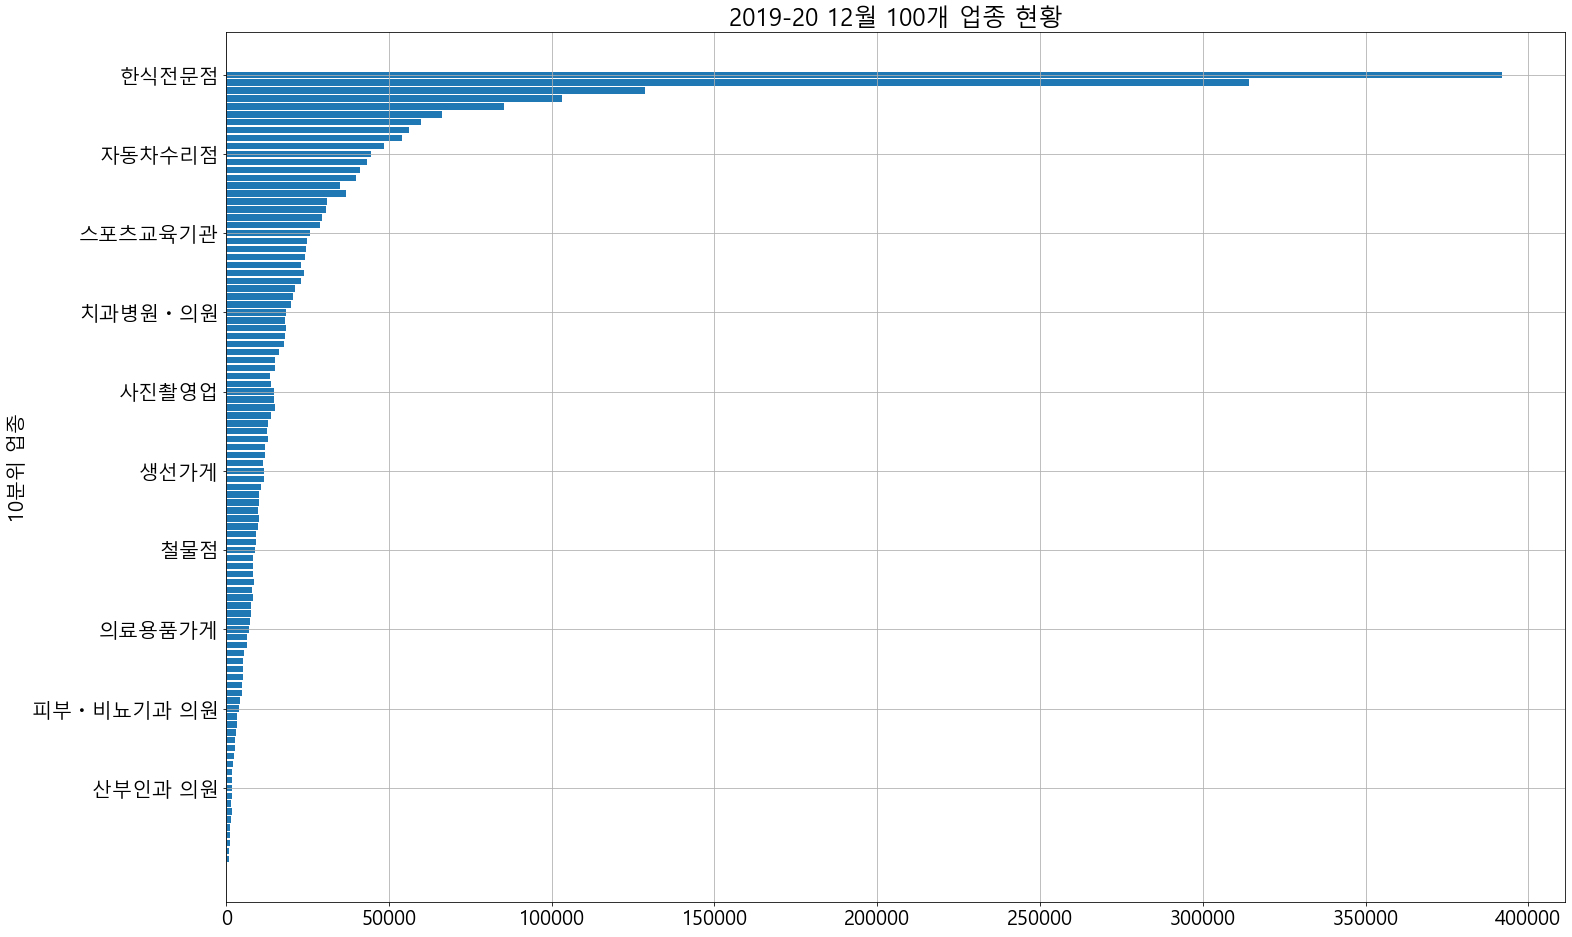

In [822]:
plt.figure(figsize=(24,16))
plt.rcParams["font.size"] = 20
plt.barh(df_total.index.values, df_total['total'].values)
plt.grid(True)
plt.title("2019-20 12월 100개 업종 현황")
plt.yticks(df_total.index[list(map(lambda x:x*N+9,range(int(len(df_total.index)/N))))].values)
plt.ylabel('10분위 업종')

Text(0.5, 1.0, '2019-20 12월 Top [20:40] 개 업종 현황')

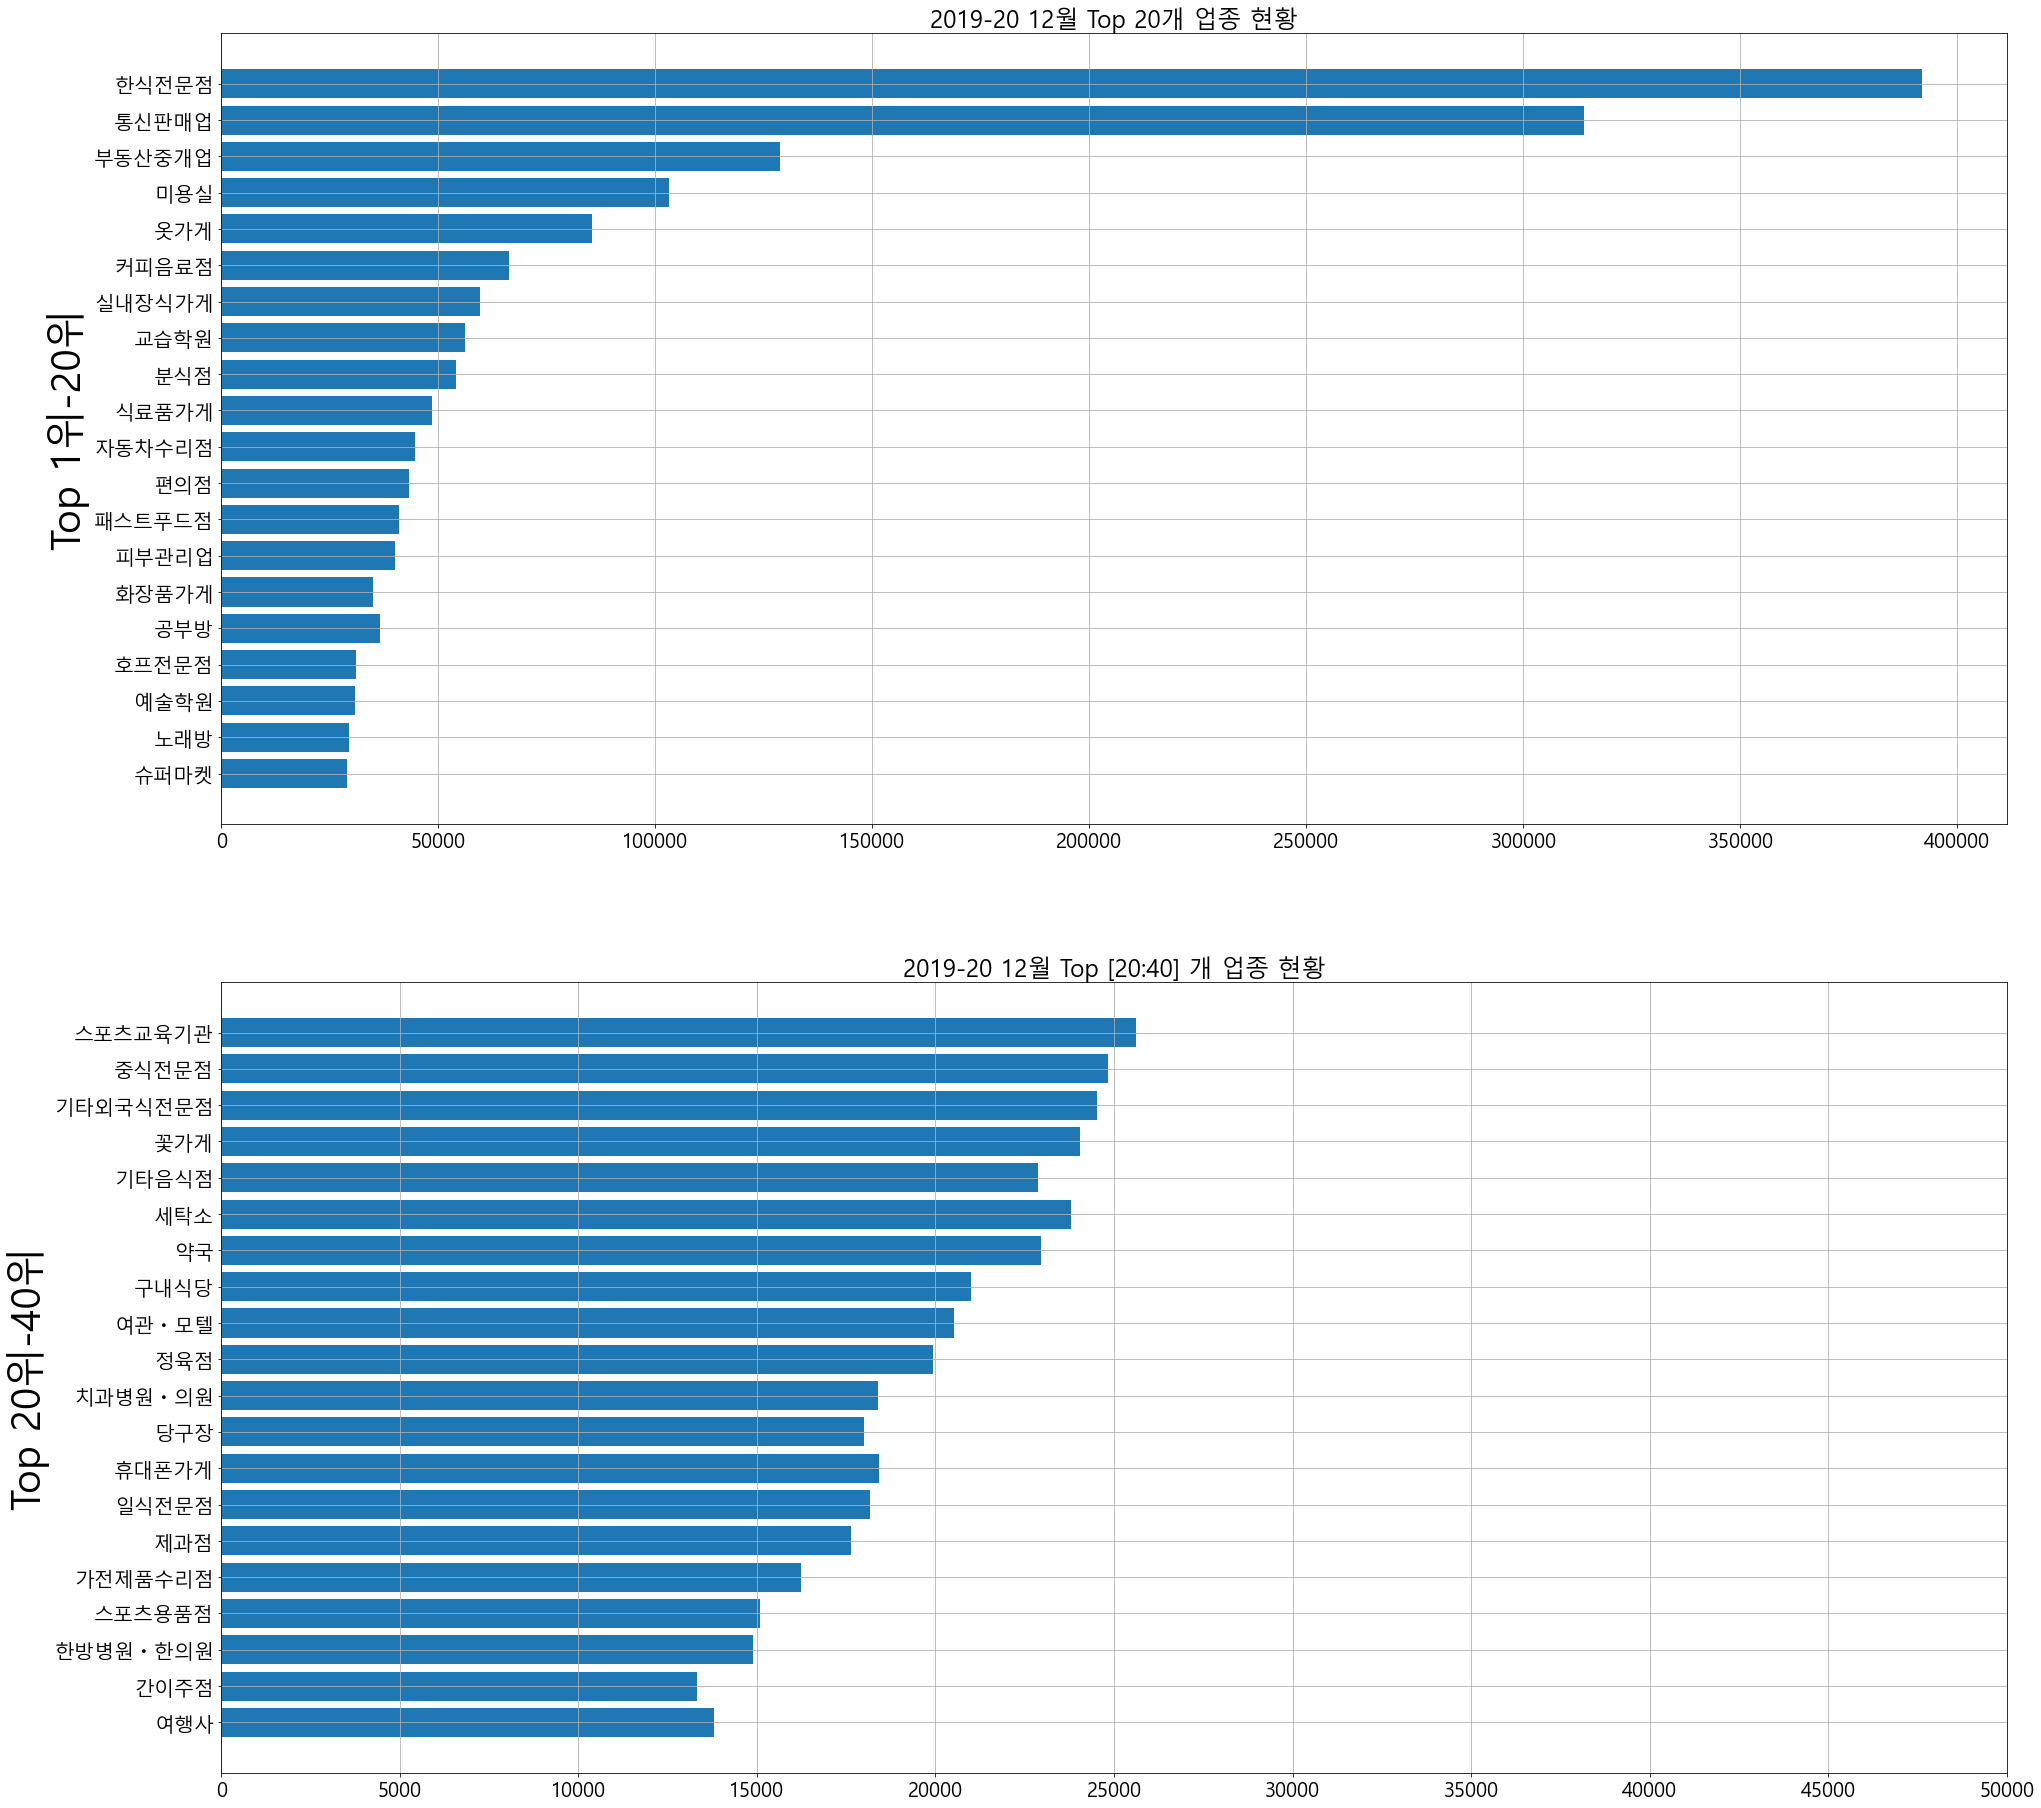

In [831]:
fig, axes = plt.subplots(2,1, figsize =(32,32))
axes[0].barh(df_total.index.values[-20:],df_total['total'].values[-20:])
axes[0].grid(True)
axes[0].set_ylabel("Top 1위-20위",fontsize=40)
axes[0].set_title("2019-20 12월 Top 20개 업종 현황")
axes[1].barh(df_total.index.values[-40:-20],df_total['total'].values[-40:-20])
axes[1].set_xticks(np.arange(0,55000,step = 5000))
axes[1].set_ylabel("Top 20위-40위",fontsize=40)
axes[1].grid(True)
axes[1].set_title("2019-20 12월 Top [20:40] 개 업종 현황")

In [811]:
df_total['total'] =df_total.mean(axis=1)
df_total['total'] =df_total['total'].astype(int)

In [812]:
df_total

,2019,2020,total
예식장,890,828,859
공인노무사,908,993,950
변리사,1029,1054,1041
기술사,1059,1158,1108
감정평가사,1169,1234,1201
...,...,...,...
옷가게,86092,84746,85419
미용실,101771,104713,103242
부동산중개업,125057,132291,128674
통신판매업,271383,356776,314079


In [670]:
df.index[-1]

'한식전문점'

In [710]:
int(len(df.index)/3)

33

In [712]:
N=10
list(map(lambda x:x*N+1,range(int(len(df.index)/N))))

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]

In [715]:
N=10
df.index[list(map(lambda x:x*N+9,range(int(len(df.index)/N))))].values

array(['산부인과 의원', '피부ㆍ비뇨기과 의원', '의료용품가게', '철물점', '생선가게', '사진촬영업',
       '치과병원ㆍ의원', '스포츠교육기관', '자동차수리점', '한식전문점'], dtype=object)

Text(0, 0.5, '10분위 업종')

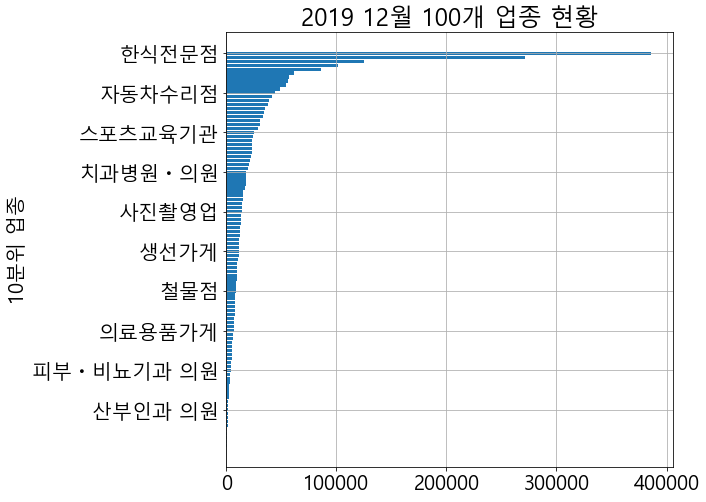

In [719]:
plt.barh(df.index.values,df['val'].values)
plt.grid(True)
plt.title("2019 12월 100개 업종 현황")
plt.yticks(df.index[list(map(lambda x:x*N+9,range(int(len(df.index)/N))))].values)
plt.ylabel('10분위 업종')

In [ ]:
x=np.arange(len(df.index))
w=0.4
fig , axes = plt.subplots(2,2, figsize=(16,16))
axes[0,0].barh(df.index.values,df['val'].values)
axes[0,0].set_title("2019년 지역별 사업자 현황", fontsize=30)
axes[1].bar(df.index,df['val'].values, width=0.4, color='gray', label='2019')
axes[1].bar(x+w,df2['val'].values, width=0.4, color='blue', label='2020')
axes[1].legend(loc='best')
#axes[1].set_yticks(np.arange(0, 800000, step=200000), ('0', '0.2M', '0.4M', '0.6M', '0.8M', '1M'))
axes[1].grid(True)
axes[1].set_title("[그림1.2] 2019-20년 5개 지역 사업자 변화", fontsize=30)

## 3. 3. 지역별 주요 업종 비교
*  지역 : 강원도, 경기도, 서울특별시, ... ,제주특별자치도
* 업종 : 가구점, ... 미용사, 변리사, ...,합계 
    - 지역별 Top20 업종 사업자 현황 

In [1207]:
data.columns[1:]

Index(['가구점', '가스충전소', '가전제품수리점', '가전제품판매점', '간이주점', '간판광고물업', '감정평가사',
       '건강보조식품가게', '건어물가게', '건축사', '결혼상담소', '곡물가게', '공부방', '공인노무사', '공인회계사',
       '과일가게', '교습학원', '구내식당', '기술및직업훈련학원', '기술사', '기타 일반의원', '기타외국식전문점',
       '기타음식점', '꽃가게', '내과ㆍ소아과 의원', '노래방', '담배가게', '당구장', '독서실', '동물병원', '목욕탕',
       '문구점', '미용실', '법무사', '변리사', '변호사', '부동산중개업', '분식점', '사진촬영업', '산부인과 의원',
       '생선가게', '서점', '성형외과 의원', '세무사', '세탁소', '슈퍼마켓', '스포츠교육기관', '스포츠시설운영업',
       '스포츠용품점', '시계ㆍ귀금속점', '식료품가게', '신경정신과 의원', '신발가게', '실내스크린골프점', '실내장식가게',
       '실외골프연습장', '안경점', '안과 의원', '애완용품점', '약국', '여관ㆍ모텔', '여행사', '예술학원', '예식장',
       '옷가게', '의료용품가게', '이륜자동차판매점', '이발소', '이비인후과 의원', '일반외과 의원', '일식전문점',
       '자동차수리점', '자전거판매점', '장난감가게', '정육점', '제과점', '종합병원', '주유소', '주차장운영업',
       '중고차판매점', '중식전문점', '채소가게', '철물점', '치과병원ㆍ의원', '침구ㆍ커튼가게', '커피음료점',
       '컴퓨터판매점', '통신판매업', '패스트푸드점', '펜션ㆍ게스트하우스', '편의점', '피부ㆍ비뇨기과 의원', '피부관리업',
       '피시방', '한방병원ㆍ한의원', '한식전문점', '헬스클럽', '호프전문점', '화장품가게', '휴대폰가게'],
      dtyp

In [1208]:
#?data.index.droplevel
df_19 = pd.DataFrame(data.loc[idx[[2019],12,idx[:'제주특별자치도']]][data.columns[1:]].stack())
df_20 =pd.DataFrame(data.loc[idx[[2020],12,idx[:'제주특별자치도']]][data.columns[1:]].stack())
df_19.rename(columns={0:2019},inplace=True)
df_20.rename(columns={0:2020},inplace=True)
df_19 = df_19.loc[idx[2019,12,idx[:]]]
df_20 = df_20.loc[idx[2020,12,idx[:]]]

In [1209]:
#?data.index.droplevel

In [1210]:
df_19.index

MultiIndex([(    '강원도',        '가구점'),
            (    '강원도',      '가스충전소'),
            (    '강원도',    '가전제품수리점'),
            (    '강원도',    '가전제품판매점'),
            (    '강원도',       '간이주점'),
            (    '강원도',     '간판광고물업'),
            (    '강원도',      '감정평가사'),
            (    '강원도',   '건강보조식품가게'),
            (    '강원도',      '건어물가게'),
            (    '강원도',        '건축사'),
            ...
            ('제주특별자치도',        '편의점'),
            ('제주특별자치도', '피부ㆍ비뇨기과 의원'),
            ('제주특별자치도',      '피부관리업'),
            ('제주특별자치도',        '피시방'),
            ('제주특별자치도',   '한방병원ㆍ한의원'),
            ('제주특별자치도',      '한식전문점'),
            ('제주특별자치도',       '헬스클럽'),
            ('제주특별자치도',      '호프전문점'),
            ('제주특별자치도',      '화장품가게'),
            ('제주특별자치도',      '휴대폰가게')],
           names=['city', None], length=1500)

In [1211]:
df_19.loc[idx['강원도',tp20col],:].sort_values(by=2019,ascending=False)

2019
city              
강원도  한식전문점   19552
     통신판매업    3665
     미용실      3567
     옷가게      3180
     식료품가게    2840
     부동산중개업   2597
     커피음료점    2191
     패스트푸드점   1880
     자동차수리점   1790
     편의점      1694
     분식점      1627
     교습학원     1454
     호프전문점    1375
     실내장식가게   1118
     화장품가게    1103
     피부관리업    1094
     슈퍼마켓     1017
     공부방       894
     예술학원      887
     노래방       847

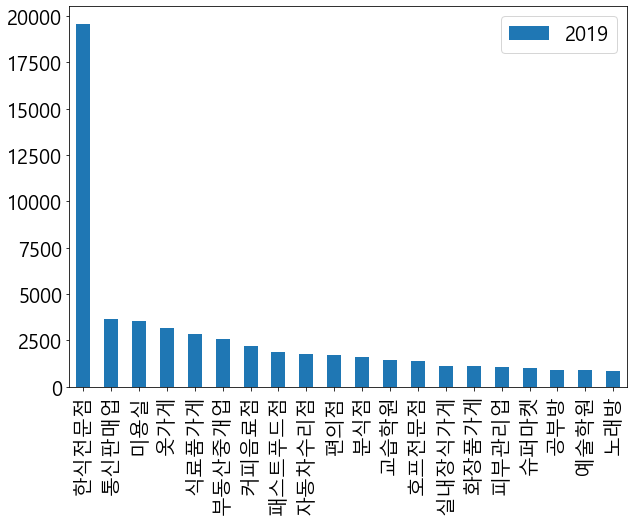

In [1167]:
df_19.loc[idx['강원도',tp20col],:].sort_values(by=2019,ascending=False).droplevel(level=0).plot.bar( figsize=(10,7))

In [1212]:
loc = df_19.groupby('city').sum().index

In [1213]:
#cols = df_19.loc[idx['강원도',tp20col],:].sort_values(by=2019,ascending=False).index.droplevel()
#vals = df_19.loc[idx['강원도',tp20col],:].sort_values(by=2019,ascending=False).values

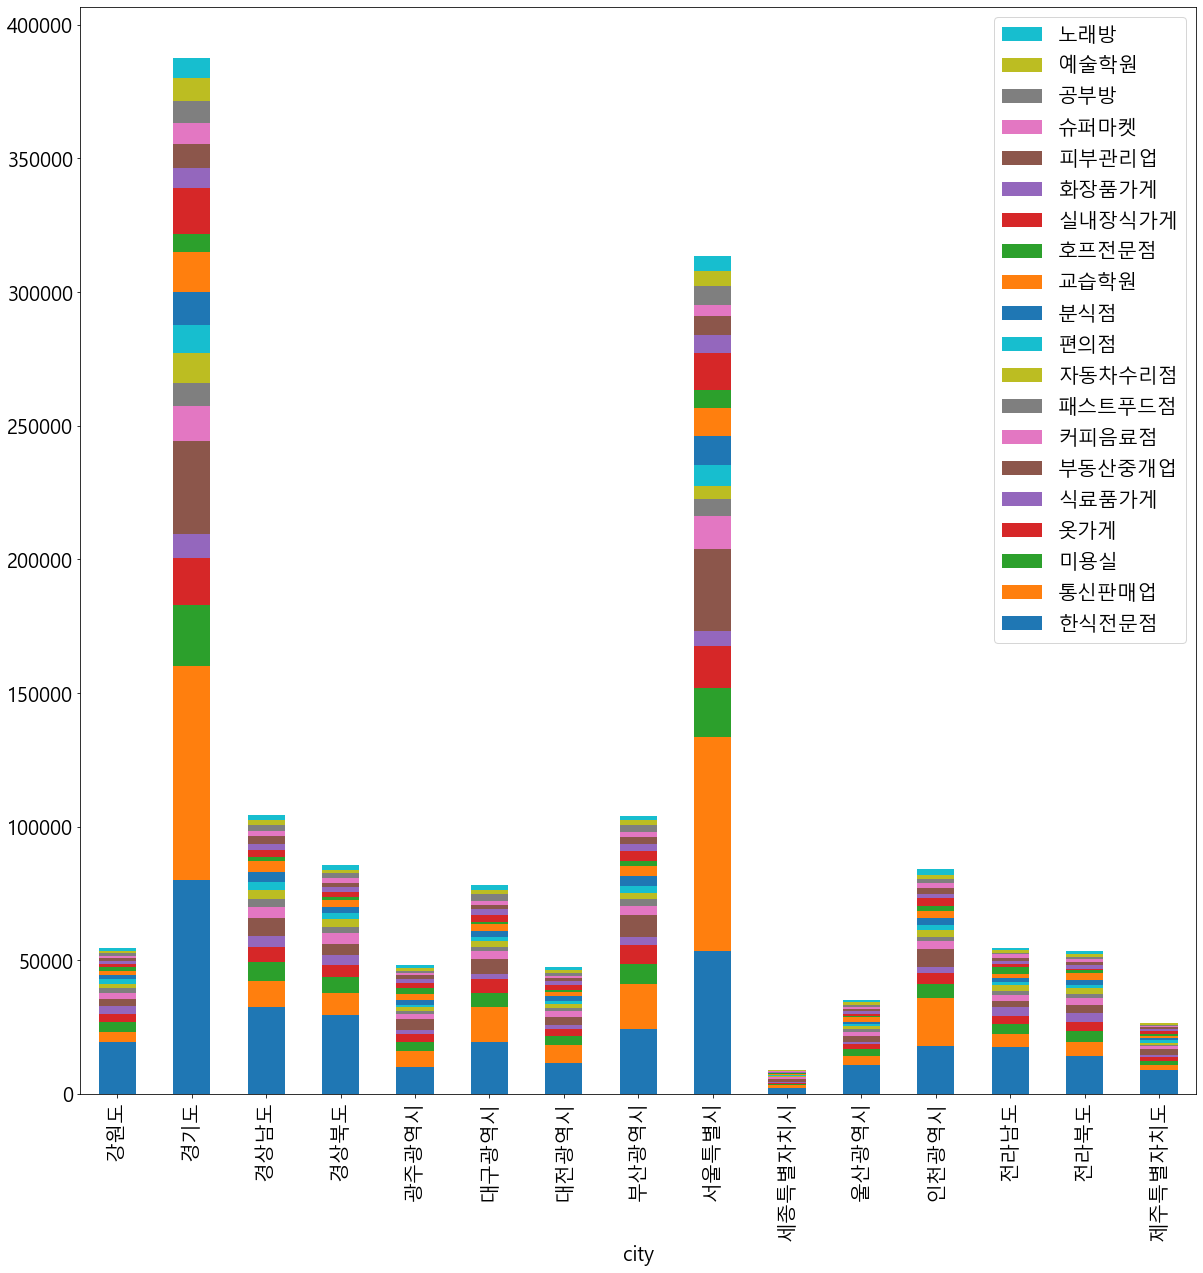

In [1228]:
df = df_19.unstack()
df.columns = df.columns.droplevel(level=0)
df[cols].plot.bar(stacked=True,figsize = (20,20), legend='reverse')

In [1200]:
for i in range(len(cols)):
    df_19.loc[idx[cols[0],tp20col],:].sort_values(by=2019,ascending=False).unstack()

KeyError: '한식전문점'

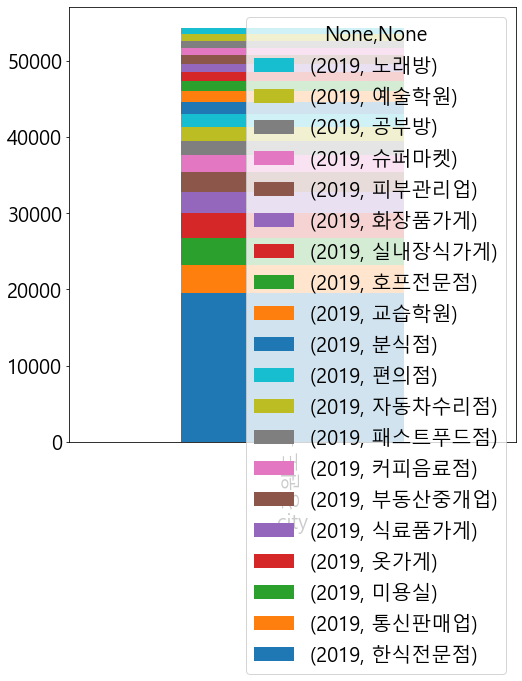

In [1184]:
df_19.loc[idx['강원도',tp20col],:].sort_values(by=2019,ascending=False).unstack().plot.bar(stacked=True, legend = 'reverse')

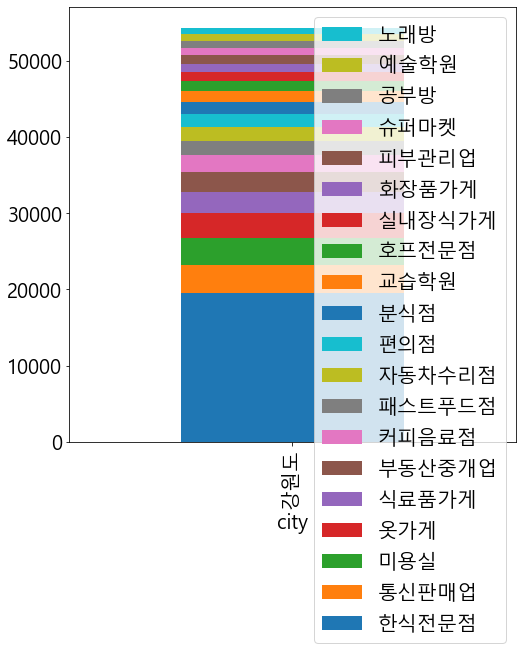

In [1193]:
    df = df_19.loc[idx['강원도',tp20col],:].sort_values(by=2019,ascending=False).unstack()
    df.columns = df.columns.droplevel()
    df.plot.bar(stacked=True, legend = 'reverse')

<BarContainer object of 1 artists>

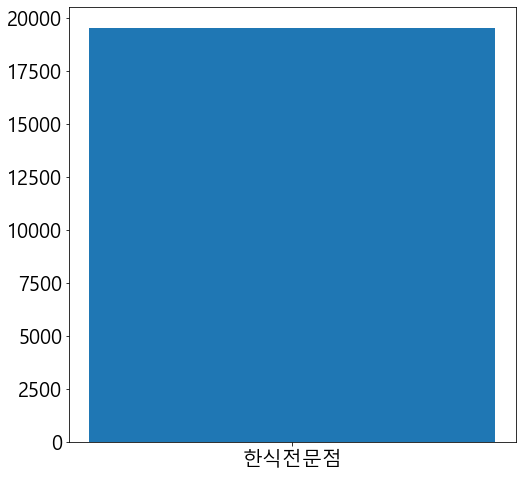

In [1153]:
plt.bar(cols[0],vals[0])

In [1159]:
vals.flatten()[:k-2]

array([19552,  3665,  3567,  3180,  2840,  2597,  2191,  1880,  1790,
        1694,  1627,  1454,  1375,  1118,  1103,  1094,  1017],
      dtype=int64)

AttributeError: 'Rectangle' object has no property 'stacked'

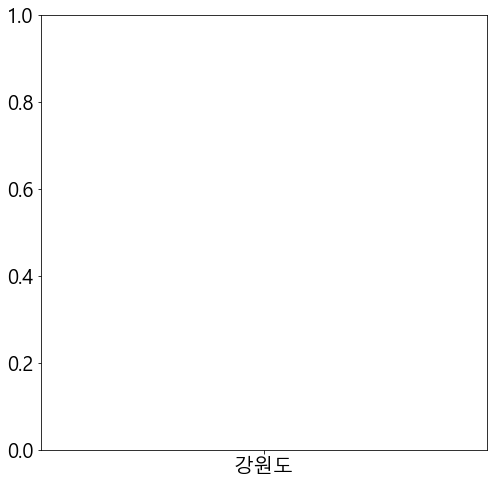

In [1163]:
for k in range(1,len(cols)):
    plt.bar('강원도',vals.flatten()[k], stacked=True)

In [1109]:
for i in range(len(loc))
    df_19.loc[idx[len(i),tp20col],:].sort_values(by=2019,ascending=False)

2019
city               
강원도  가구점        302
     가스충전소       95
     가전제품수리점    541
     가전제품판매점    467
     간이주점       428
...             ...
     한식전문점    19552
     헬스클럽       223
     호프전문점     1375
     화장품가게     1103
     휴대폰가게      621

[100 rows x 1 columns]

In [1023]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 20
plt.bar(df_19.loc['강원도'])

TypeError: bar() missing 1 required positional argument: 'height'

In [ ]:
plt.

In [559]:
ax = bx
bx +=10
df_19[idx[2019,12,]:][df_19.columns[1:]].sort_values(by=)

TypeError: sort_values() missing 1 required positional argument: 'by'

In [ ]:
df_19[idx[2019, ]]

In [486]:
colors = ['silver', 'gold', 'whitesmoke', 'lightgray']*17

In [483]:
colors

['silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray']

In [ ]:
#PIE

In [ ]:
#Bar

-------------------------------------------------
-----------------------------------------------
-----------------------------------------------
-------------------------------------------------
-----------------------------------------------
-----------------------------------------------
-----------------------------------------------

-------------------------------------------------
-----------------------------------------------
-----------------------------------------------
------------------------------------------------------------------------------------------------
-----------------------------------------------
-----------------------------------------------
-----------------------------------------------